<a href="https://colab.research.google.com/github/yuvalBerghaus/computer_vision/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

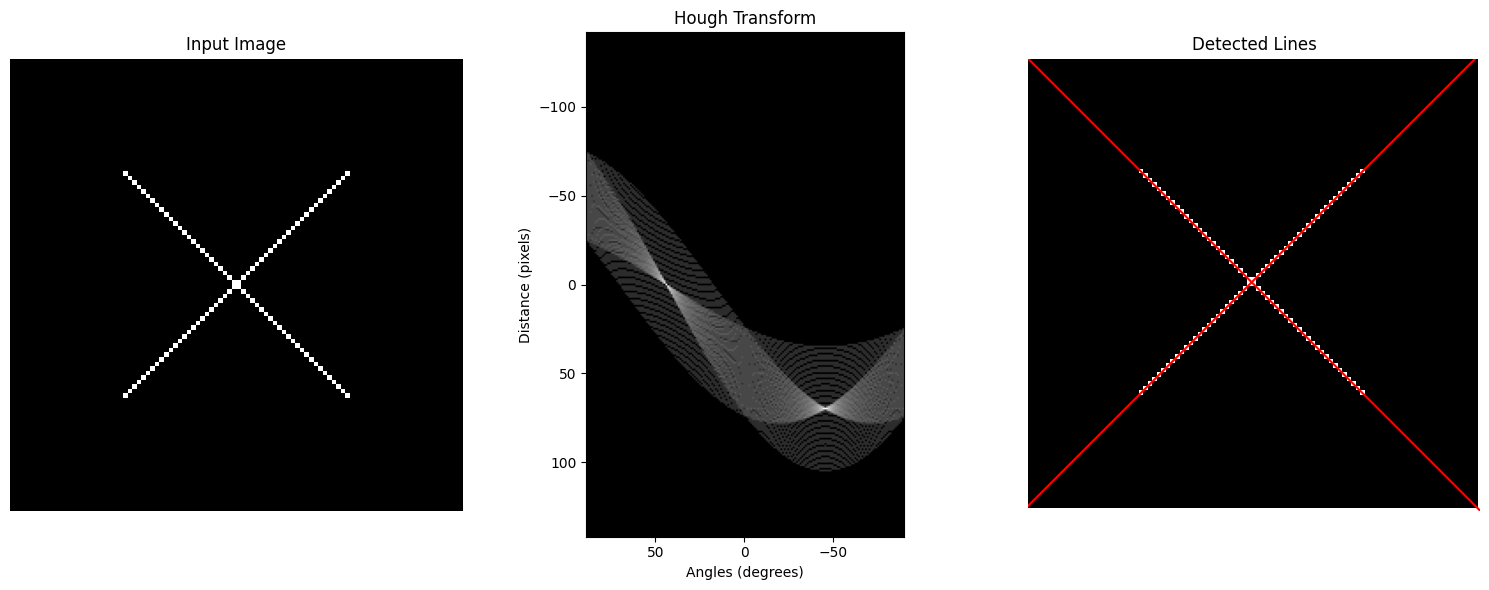

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from skimage import data
from skimage.feature import canny
from skimage.draw import line as draw_line
from matplotlib import cm

# Constructing a test image
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating the figure
fig, axes = plt.subplots(1, 3, figsize=(15, 6), subplot_kw={'adjustable': 'box'})
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input Image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough Transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected Lines')

plt.tight_layout()
plt.show()

right image - represents the original image with the lines that are presented in red.
middle image - displays the angles and the length of each line in order to find overlapping

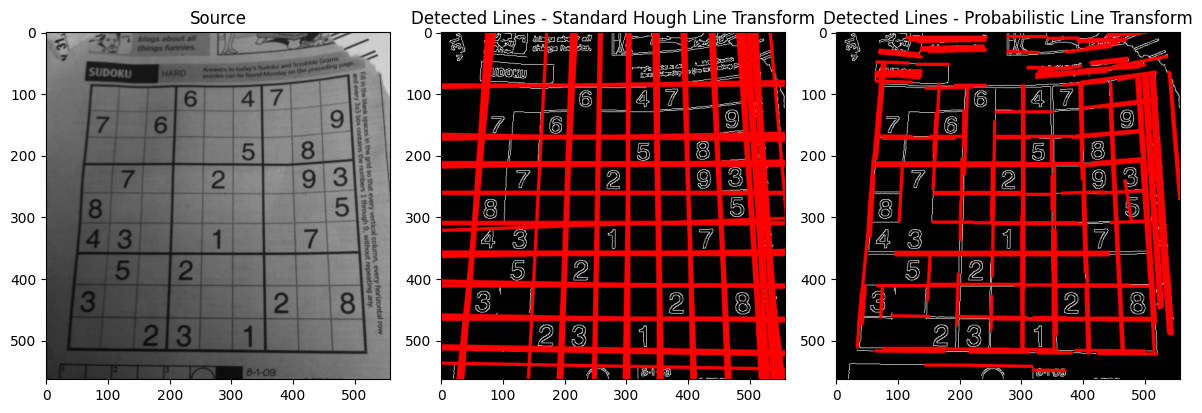

In [ ]:
import sys
import math
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def main(argv):
    default_file = 'sudoku.png'
    filename = argv[0] if len(argv) > 0 else default_file

    src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)

    if src is None:
        print('Error opening image!')
        print('Usage: hough_lines.py [image_name - default ' + default_file + '] \n')
        return -1

    dst = cv.Canny(src, 50, 200, None, 3)
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv.line(cdst, pt1, pt2, (0, 0, 255), 3, cv.LINE_AA)

    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 3, cv.LINE_AA)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    plt.title('Source')

    plt.subplot(1, 3, 2)
    plt.imshow(cv.cvtColor(cdst, cv.COLOR_BGR2RGB))
    plt.title('Detected Lines - Standard Hough Line Transform')

    plt.subplot(1, 3, 3)
    plt.imshow(cv.cvtColor(cdstP, cv.COLOR_BGR2RGB))
    plt.title('Detected Lines - Probabilistic Line Transform')

    plt.tight_layout()
    plt.show()

    return 0

if __name__ == "__main__":
    main(['sudoku.png'])

לדעתי התמונה השנייה יותר טובה כי היא תוחמת את אזור הסודוקו ולא פשוט מוצאת ריבועים